EN3160 - Image Processing and Computer Vision 

Question 01

51
0
100
0
105
256


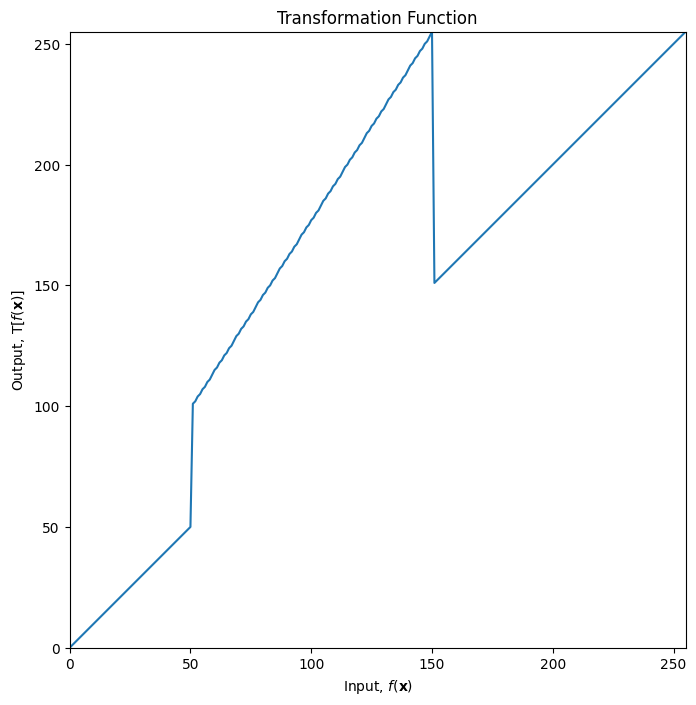

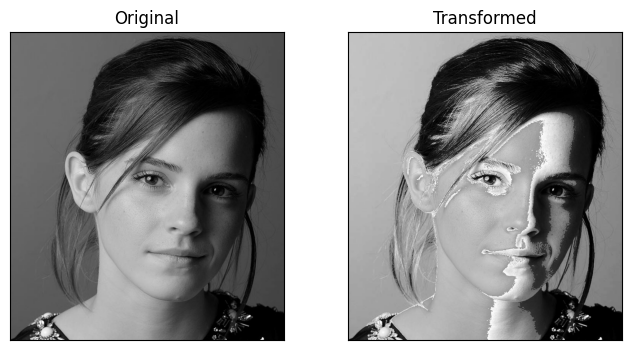

In [42]:
# Importing necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Creating an array 'c'
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# Generating linearly spaced values for the transformation
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
print(len(t3))

t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
print(len(t4))

t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')
print(len(t5))

# Concatenating the transform1ations to create the final 'transform1' array
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, t3), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, t4), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, t5), axis=0).astype('uint8')
print(len(transform1))

# Creating a plot using matplotlib
fig, ax = plt.subplots()
ax.plot(transform1)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_title('Transformation Function')
ax.set_aspect('equal')
plt.savefig('q1.png', dpi=300)
plt.show()

img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
# cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", img_orig)
# cv.waitKey(0)
image_transformed1 = cv.LUT(img_orig, transform1)
# cv.imshow("Image", image_transformed111)
# cv.waitKey(0)
# cv.destroyAllWindows()
f = plt.figure(figsize=(8,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(img_orig), ax1.title.set_text('Original')
ax2.imshow(image_transformed1), ax2.title.set_text('Transformed')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
plt.show()

Question 02


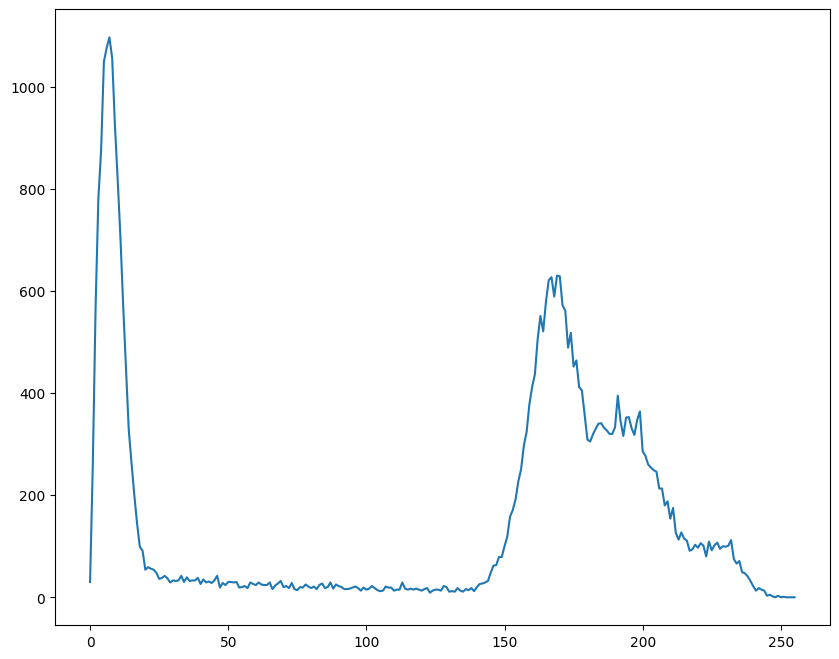

In [43]:
#import libraries
import PIL
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt

img = cv.imread('images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

# find frequency of pixels in range 0-255
histr = cv.calcHist([img],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(histr)
plt.show()

# this graph helps us to determine which areas needs to be accented

151
0
105
256


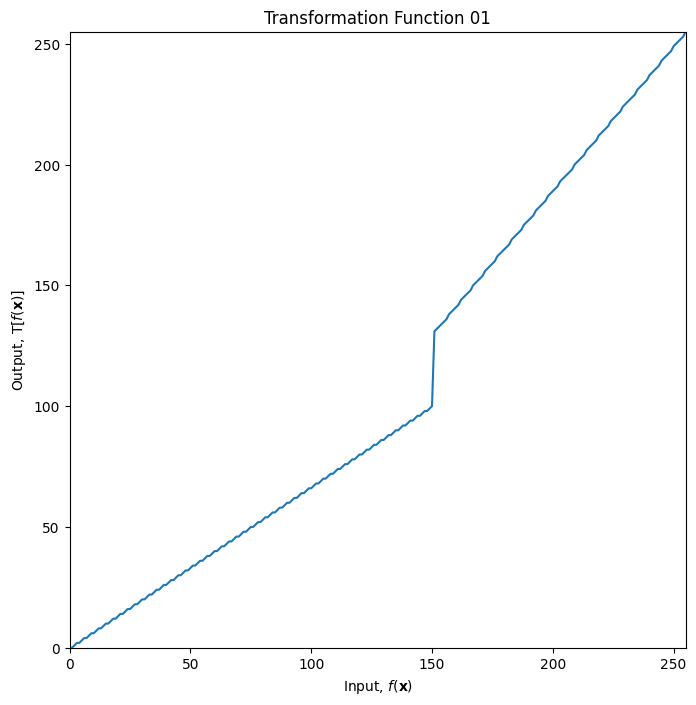

76
0
125
0
55
256


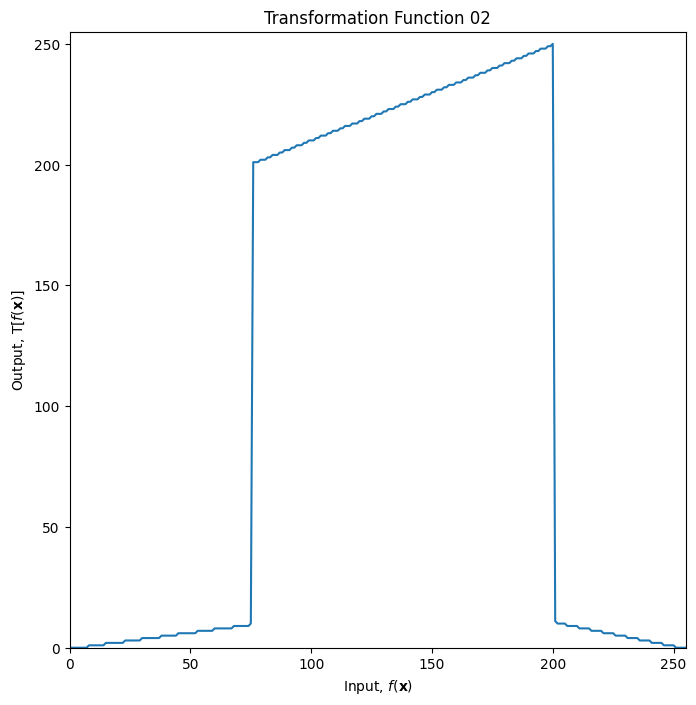

([], [])

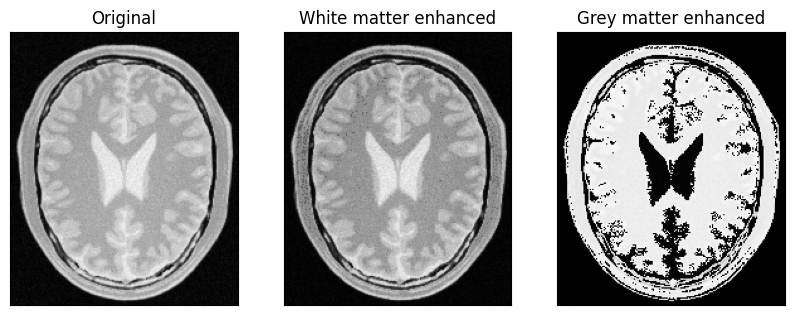

In [44]:
# Importing necessary libraries
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


#-------------------------------------------------------------

# Transform 01
# Creating an array 'c'
c = np.array([(150, 100), (150, 130)])

# Generating linearly spaced values for the transformation
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

# Concatenating the transformations to create the final 'transform1' array
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, t3), axis=0).astype('uint8')
print(len(transform1))

# Creating a plot using matplotlib
fig, ax = plt.subplots()
ax.plot(transform1)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_title('Transformation Function 01')
ax.set_aspect('equal')
plt.savefig('q1.png')
plt.show()

#-------------------------------------------------------------
# Transform 02

"""
def pdf(x, mean, std):
    y_out = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * std ** 2))
    return y_out

x = np.linspace(0, 255, 256)  # Create an array of values from 0 to 255
mean = np.mean(x)             # Mean of x
std = np.std(x)               # Standard deviation of x
transform2 = pdf(x, mean, std)         # Calculate the PDF values

# Creating a plot using matplotlib for y
fig, ax = plt.subplots()
ax.plot(x, transform2)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax.set_xlim([0, 255])
ax.set_title('Transformation Function 02')
ax.set_aspect('equal')

plt.show()

def plot_pdf(mean):
    x = np.linspace(0, 255, 256)  # Create an array of values from 0 to 255
    std = 50  # You can adjust the standard deviation as needed
    y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * std ** 2))
    
    # Creating a plot using matplotlib for the PDF
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r'Input, $f(\mathbf{x})$')
    ax.set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
    ax.set_xlim([0, 255])
    ax.set_title(f'Transformation Function (Mean = {mean})')
    ax.set_aspect('equal')
    
    plt.show()

# Call the function with the desired mean value
transform2 = plot_pdf(mean=125)
"""

# Creating an array 'c'
c = np.array([(75, 10), (75, 200), (200, 250), (200, 10)])

# Generating linearly spaced values for the transformation
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
print(len(t3))

t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
print(len(t4))

t5 = np.linspace(c[3,1] + 1, 0, 255 - c[3,0]).astype('uint8')
print(len(t5))

# Concatenating the transform1ations to create the final 'transform1' array
transform2 = np.concatenate((t1, t2), axis=0).astype('uint8')
transform2 = np.concatenate((transform2, t3), axis=0).astype('uint8')
transform2 = np.concatenate((transform2, t4), axis=0).astype('uint8')
transform2 = np.concatenate((transform2, t5), axis=0).astype('uint8')
print(len(transform2))



# Creating a plot using matplotlib
fig, ax = plt.subplots()
ax.plot(transform2)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_title('Transformation Function 02')
ax.set_aspect('equal')
plt.savefig('q1.png')
plt.show()


#-------------------------------------------------------------

#function to remove salt and pepper noise
def remove_salt_pepper_noise(image):
    # Apply median filter
    kernal_size = 1
    filtered = cv.medianBlur(image, kernal_size) 
    return filtered

img_orig = cv.imread('images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
# cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", img_orig)
# cv.waitKey(0)
image_transformed1 = cv.LUT(img_orig, transform1)
image_transformed1 = remove_salt_pepper_noise(image_transformed1)
image_transformed2 = cv.LUT(img_orig, transform2)
image_transformed2 = remove_salt_pepper_noise(image_transformed2)
# cv.imshow("Image", image_transformed1)
# cv.waitKey(0)
# cv.destroyAllWindows()
f = plt.figure(figsize=(10,4))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax1.imshow(img_orig), ax1.title.set_text('Original')
ax2.imshow(image_transformed1), ax2.title.set_text('White matter enhanced')
ax3.imshow(image_transformed2), ax3.title.set_text('Grey matter enhanced')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
ax3.set_xticks([]), ax3.set_yticks([])
# plt.show()

Question 03

[[  7   7  12 ...  18  23  26]
 [  7   6   8 ...  20  26  27]
 [  7   3   3 ...  23  27  29]
 ...
 [ 36  44  50 ... 120 135 146]
 [ 50  63  70 ... 129 148 152]
 [ 75  84  80 ... 141 150 136]]


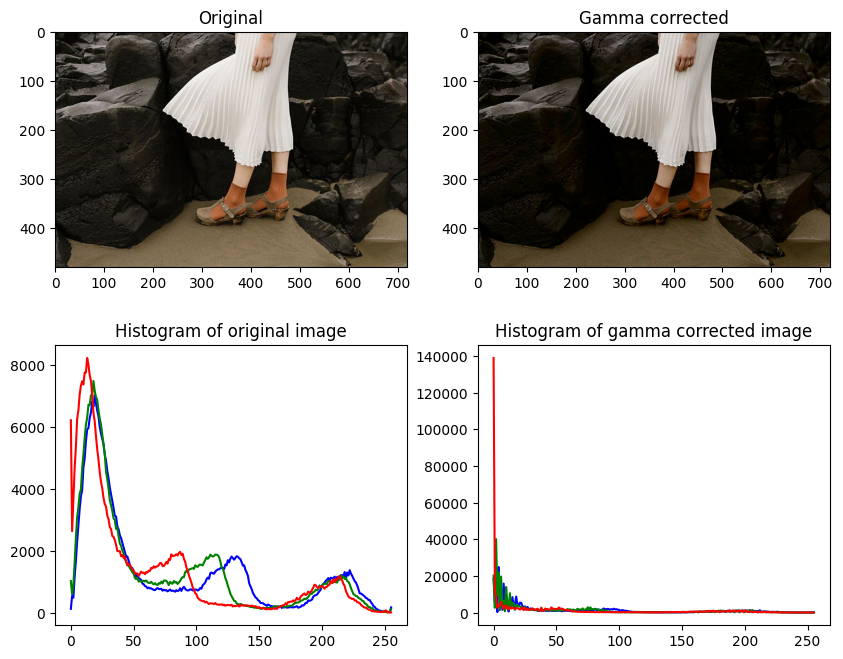

In [45]:
# Importing necessary libraries
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Increase the figure size
plt.rcParams['figure.figsize'] = [10, 8]

#--------------------Question 03(a)--------------------
gamma = 1.5                  # Replace with desired gamma value
table = np.array([((i / 255.0) ** (gamma)) * 255.0 for i in np.arange(0, 256)]).astype('uint8') # Lookup table

#split into L*a*b* channels
img_orig = cv.imread('images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)    
lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)   # convert from BGR to LAB color space
l, a, b = cv.split(lab)
print(l)
img_gamma = cv.LUT(l, table) # apply gamma correction using the lookup table

#combine the channels
img_gamma = cv.merge((img_gamma,a,b))

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)      # convert from LAB to BGR
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)    # convert from LAB to BGR                                                                                   

fig, axarr = plt.subplots(2, 2)

axarr[0, 0].imshow(img_orig)
axarr[0, 0].title.set_text('Original')
axarr[0, 1].imshow(img_gamma)
axarr[0, 1].title.set_text('Gamma corrected')

#--------------------Question 03(b)--------------------
color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    axarr[1, 0].title.set_text('Histogram of original image')

    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c) 
    axarr[1, 1].title.set_text('Histogram of gamma corrected image')
    
# # remove axis ticks and labels
# sets = [[(i,j) for i in range(2)] for j in range(2)]
# for i,j in sets:
#     axarr[i, j].set_xticks([]), axarr[0, 0].set_yticks([])
    
plt.show()





Question 04

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img = cv.imread("shells.tif", cv.IMREAD_GRAYSCALE)

#--------------------Question 04(a)--------------------
# split the image into hue, saturation and value components
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

a = 0.5         # a is between [0, 1]
sigma = 70      # sigma is between [0, 255]??

# define the transformation function
def int_trans(x, a, sigma):
    f = min(x + a[0]/128*np.exp(-(x-128)**2/(2*sigma**2)), 255) 
    return f

# apply the above transformation to the saturation channel
transformed_s = np.array([f[i] for i in s.ravel()]).reshape(s.shape).astype('uint8')

# combine the channels
transformed_hsv = cv.merge((h, transformed_s, v))

# convert back to BGR
transformed_img = cv.cvtColor(transformed_hsv, cv.COLOR_HSV2BGR)

#--------------------Question 04(b)--------------------


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Question 05

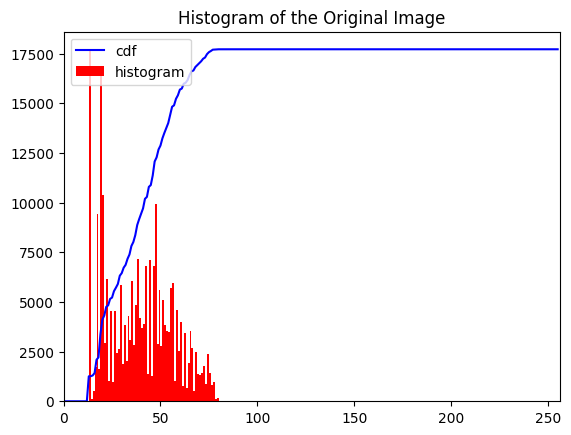

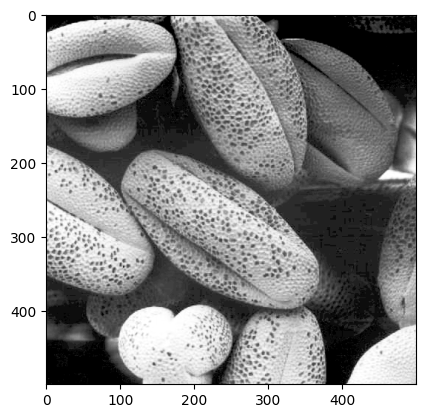

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/shells.tif', cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.ravel(), 256, [0, 256]) # .ravel() flattens the array
# bins return the bin edges (length(hist)+1)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()   # normalize the cdf
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()
# show new histogram
img = cv.imread('images/shells.tif', cv.IMREAD_GRAYSCALE)


equ = cv.equalizeHist(img)  # apply histogram equalization
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
# show the image
plt.imshow(equ, cmap='gray')




Question 06

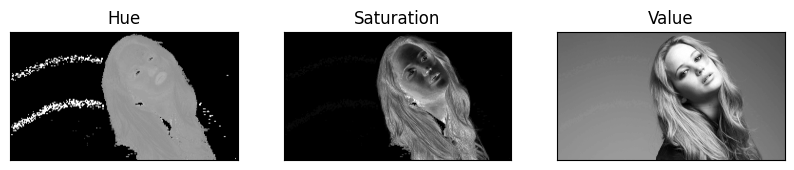

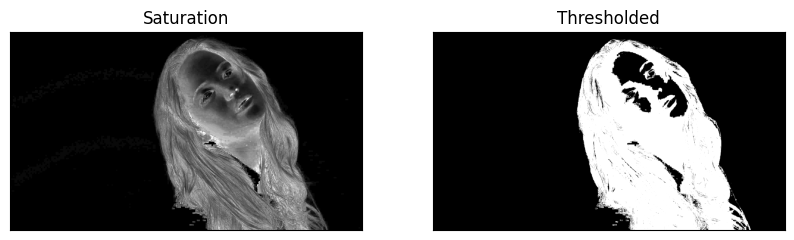

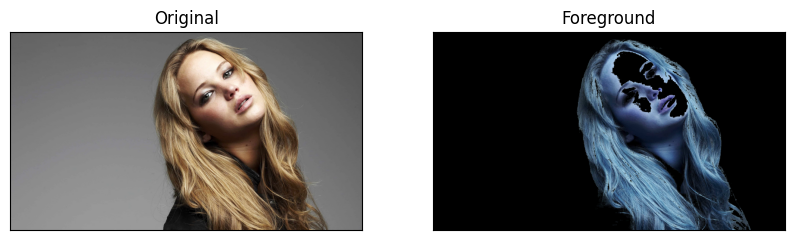

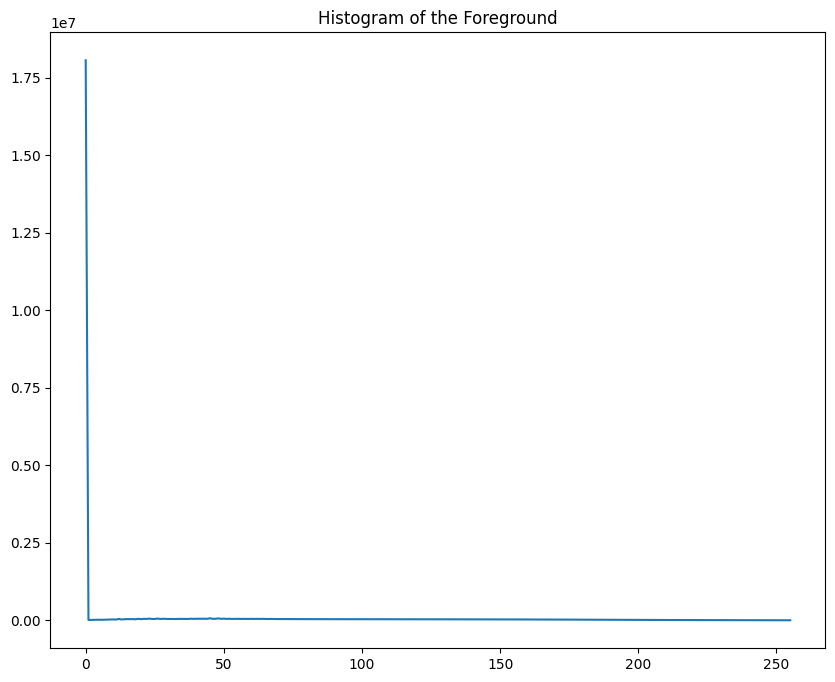

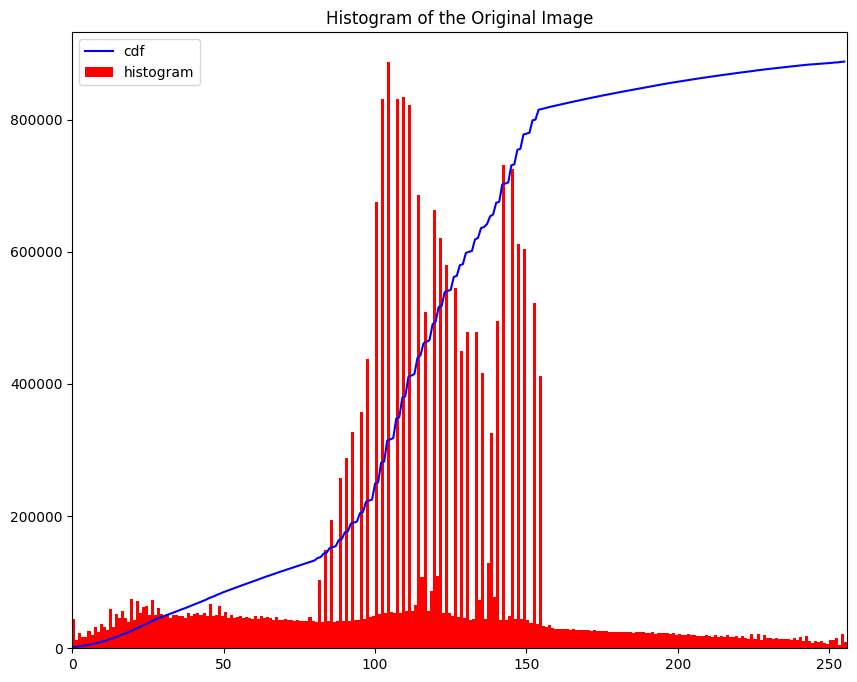

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --------------------Question 06(a)--------------------
img = cv.imread('images/jeniffer.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# split image into hsv plane
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
# plot the below images in a 1x3 grid
fig, axarr = plt.subplots(1, 3)
axarr[0].imshow(h, cmap='gray')
axarr[0].title.set_text('Hue')
axarr[1].imshow(s, cmap='gray')
axarr[1].title.set_text('Saturation')
axarr[2].imshow(v, cmap='gray')
axarr[2].title.set_text('Value')
# remove axis ticks and labels
for i in range(3):
    axarr[i].set_xticks([]), axarr[i].set_yticks([])
plt.show()
# plt.imshow(h, cmap='gray')
# plt.imshow(s, cmap='gray')
# plt.imshow(v, cmap='gray')

# --------------------Question 06(b)--------------------
# apply a threshold value to the saturation plane
ret, thresh = cv.threshold(s, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # Otsu's thresholding
# plot the below images in a 1x2 grid
fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(s, cmap='gray')
axarr[0].title.set_text('Saturation')
axarr[1].imshow(thresh, cmap='gray')
axarr[1].title.set_text('Thresholded')
# remove axis ticks and labels
for i in range(2):
    axarr[i].set_xticks([]), axarr[i].set_yticks([])
plt.show()

# --------------------Question 06(c)--------------------
# obtaining a forground and compute the histogram
fg = cv.bitwise_and(img, img, mask=thresh)
fg = cv.cvtColor(fg, cv.COLOR_BGR2RGB)
# plot the below images in a 1x2 grid
fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(img)
axarr[0].title.set_text('Original')
axarr[1].imshow(fg)
axarr[1].title.set_text('Foreground')
# remove axis ticks and labels
for i in range(2):
    axarr[i].set_xticks([]), axarr[i].set_yticks([])
plt.show()

hist, bins = np.histogram(fg.ravel(), 256, [0, 256])
# plot the histogram
plt.plot(hist)
plt.title('Histogram of the Foreground')
plt.show()

# --------------------Question 06(d)--------------------
# cumulative sum of the histogram using np.cumsum()
cdf = np.cumsum(hist)

# --------------------Question 06(e)--------------------
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ = cv.equalizeHist(img)
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()



Question 07